# Present and store your model

We have identified and optimized our best model by cross-validation. We train this model on the full training data now.

In [1]:
# code from previous notebooks of this section
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
import numpy as np

hb_data = pd.read_csv('HB_data.csv')
train_set, test_set = train_test_split(hb_data, test_size=0.2, random_state=42)

y_train = train_set['energy']
X_train = train_set.drop(['energy'], axis=1)

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(sparse_output=False))

preprocessing = ColumnTransformer([("num",num_pipeline, make_column_selector(dtype_include=np.number)),
                                        ("cat",cat_pipeline, make_column_selector(dtype_include=object)),])
# end code from previous notebooks of this section
 
model_final = make_pipeline(preprocessing,GradientBoostingRegressor(init=SVR(kernel="rbf", C=5000, epsilon=0.1), random_state=42,
                                  learning_rate=0.1, n_estimators=70, max_depth=5, min_samples_split=2))

model_final.fit(X_train,y_train)

,steps,"[('columntransformer', ...), ('gradientboostingregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


And we can validate our model on the test data set which was never used during the model development.

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

y_test = test_set['energy']
X_test = test_set.drop(['energy'], axis=1)

final_predictions = model_final.predict(X_test)
final_mae = mean_absolute_error(y_test, final_predictions)
print("The model has a mean absolute error of %0.2f kJ/mol on the test data set\n" % final_mae)
final_maep = mean_absolute_percentage_error(y_test, final_predictions)
print("The model has a mean absolute percentage error of %0.2f on the test data set\n" % final_maep)
final_rmse = root_mean_squared_error(y_test, final_predictions)
print("The model has a root mean square error of %0.2f kJ/mol on the test data set\n" % final_rmse)
final_max = max_error(y_test, final_predictions)
print("The model has a maximum residual error of %0.2f kJ/mol on the test data set\n" % final_max)
final_r2 = r2_score(y_test, final_predictions)
print("The model has a coefficient of determination of %0.3f on the test data set\n" % final_r2)

The model has a mean absolute error of 0.51 kJ/mol on the test data set

The model has a mean absolute percentage error of 0.03 on the test data set

The model has a root mean square error of 0.85 kJ/mol on the test data set

The model has a maximum residual error of 4.23 kJ/mol on the test data set

The model has a coefficient of determination of 0.999 on the test data set



We see that the root mean squared error is 0.85 kJ/mol. The smaller value compared to the cross-validation seems reasonable since we used a larger data set to train the model. We can also visualize the performance of our model by a scatter plot:

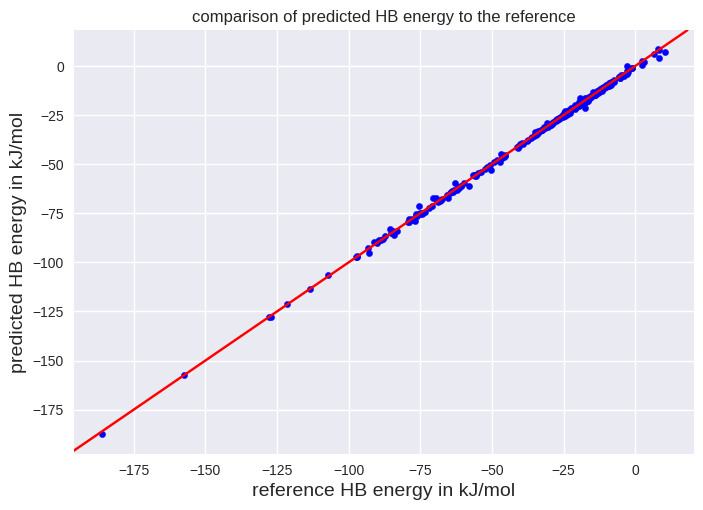

In [3]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

# The next line will add y=x to our graph 
plt.axline((0, 0), slope=1, color='r')
plt.scatter(y_test, final_predictions, color='b', s=20)
plt.xlabel("reference HB energy in kJ/mol", fontsize=14)
plt.ylabel("predicted HB energy in kJ/mol", fontsize=14)
plt.title("comparison of predicted HB energy to the reference")

plt.show()

We can store our model by:

In [4]:
import joblib

joblib.dump(model_final, "HB_energy.pkl")

['HB_energy.pkl']

You can use it later by:

In [5]:
import joblib

y_test = test_set['energy']
X_test = test_set.drop(['energy'], axis=1)

final_model_reloaded = joblib.load("HB_energy.pkl")

test_stored_model = final_model_reloaded.predict(X_test)
final_mae = mean_absolute_error(y_test, test_stored_model)
print("The model has a mean absolute error of %0.2f kJ/mol on the test data set\n" % final_mae)

The model has a mean absolute error of 0.51 kJ/mol on the test data set

